In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from skimage import data
from skimage.color import rgb2gray
from PIL import Image

In [3]:
img_count = len(os.listdir('img/')) # Gets the amount of images in the directory
avg_nicole = np.zeros((150, 150)) # Matrix that will later become the "average" image
nicoles = [] # List that will house all individual arrays of images, will become a matrix later

for nicole in range(2, img_count+1):
    # Converts images to correct size and changes its color to grayscale
    img_nicole = img.imread(f'img/nicole{nicole}.jpeg')
    img_nicole = Image.fromarray(np.uint8(img_nicole))
    img_nicole = img_nicole.convert('L')
    img_nicole = img_nicole.resize((150, 150))

    # Turns those images into an array and append them to a list that will become a matrix of images later
    array_nicole = np.array(img_nicole)
    avg_nicole += array_nicole
    nicoles.append(array_nicole.flatten())


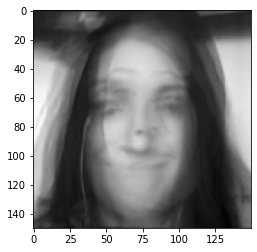

In [4]:
avg_nicole = avg_nicole/img_count # Gets the average image
plt.imshow(avg_nicole, cmap="gray")

In [5]:
def display_image(matrix, index):
    # Displays the image present in the row_{index} of the specified matrix
    resized = np.resize(matrix[index], (150, 150))
    plt.imshow(resized, cmap="gray")




In [6]:
image_matrix = np.row_stack(tuple(nicoles))
subtracted_matrix = image_matrix - avg_nicole.flatten()


In [7]:
u, s, vh = np.linalg.svd(subtracted_matrix, full_matrices=False)

In [8]:
#display_image(vh, 0)

In [9]:
def recognize(nicole_num):
    # Treats input image (the one we wish to recognize)
    img_to_recognize = img.imread('img/nicole'+str(nicole_num)+'.jpeg')
    img_to_recognize = Image.fromarray(np.uint8(img_to_recognize))
    img_to_recognize =img_to_recognize.convert('L')
    img_to_recognize = img_to_recognize.resize((150, 150))
    img_to_recognize = np.array(img_to_recognize).flatten()

    subtracted_matrix_rec = img_to_recognize - avg_nicole.flatten()


    # Projeção da imagem já subtraída da média no face space para obter o array de coeficientes (pesos de cada eigenface)
    eigenfaces_matrix = vh[:3,:]

    weights_img_to_recognize = []
    for i in range(len(eigenfaces_matrix[:, 0])):
        weight = np.dot(eigenfaces_matrix[i,:], subtracted_matrix_rec)
        weights_img_to_recognize.append(weight)
    weights_img_to_recognize = np.array(weights_img_to_recognize)

    proj_error = np.linalg.norm(subtracted_matrix_rec - np.matmul( weights_img_to_recognize , eigenfaces_matrix))

    return proj_error
    




recognize(1)
    

3373.4995833109774